In [60]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px



In [2]:
covid_df=pd.read_csv("C:/Users/Chaithanya/Desktop/covid project/archive/covid_19_india.csv")

In [3]:
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
covid_df.info()#basic information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [5]:
covid_df.drop(["Time","Sno","ConfirmedIndianNational","ConfirmedForeignNational"],inplace=True,axis=1)

In [6]:
covid_df['active_cases']=covid_df['Confirmed']-(covid_df['Cured']-covid_df['Deaths'])#calculating the no.of active cases
covid_df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,active_cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3
...,...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353,15774
18106,2021-08-11,Tripura,77811,773,80660,3622
18107,2021-08-11,Uttarakhand,334650,7368,342462,15180
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,46095


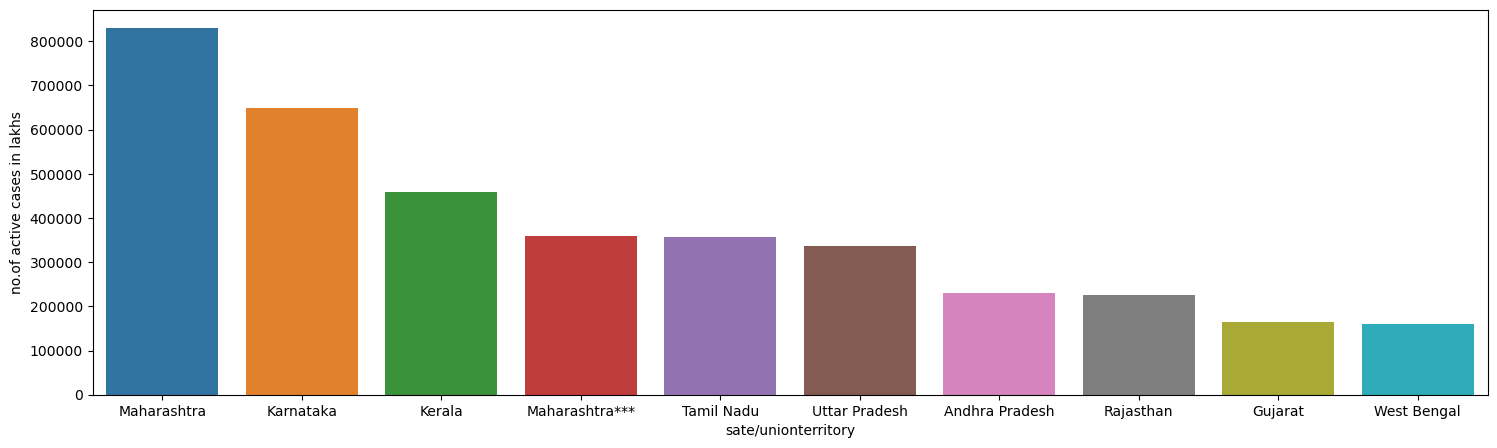

In [8]:
#most no.of active cases in states in descending order
top_10 =covid_df.groupby(by='State/UnionTerritory').max()[['active_cases','Date']].sort_values(by='active_cases',ascending=False).reset_index()
top_10
plt.figure(figsize=(18,5))
sns.barplot(data=top_10.iloc[:10],y='active_cases',x='State/UnionTerritory')
plt.xlabel("sate/unionterritory")
plt.ylabel("no.of active cases in lakhs")
plt.show()


In [9]:
#top 10 highets deaths recorded 
top_10_deaths=covid_df.groupby('State/UnionTerritory').max()[['Deaths','Date']].sort_values(by='Deaths',ascending=False).reset_index()

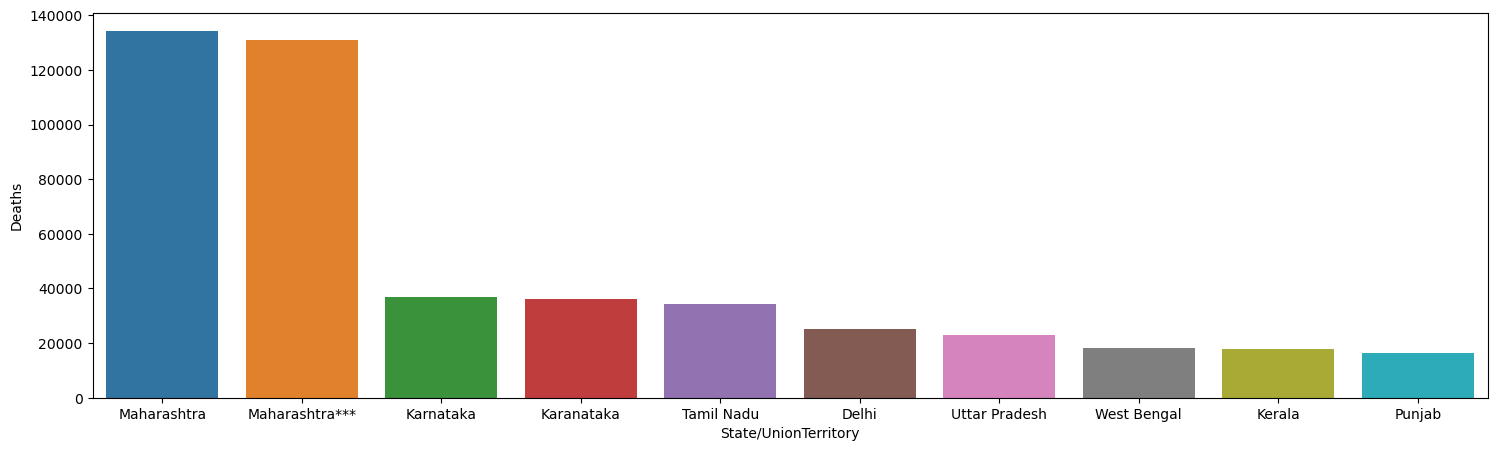

In [10]:
plt.figure(figsize=(18,5))
sns.barplot(data=top_10_deaths[:10],y='Deaths',x='State/UnionTerritory')
plt.show()

Text(0.5, 1.0, 'Top 5 effected sates')

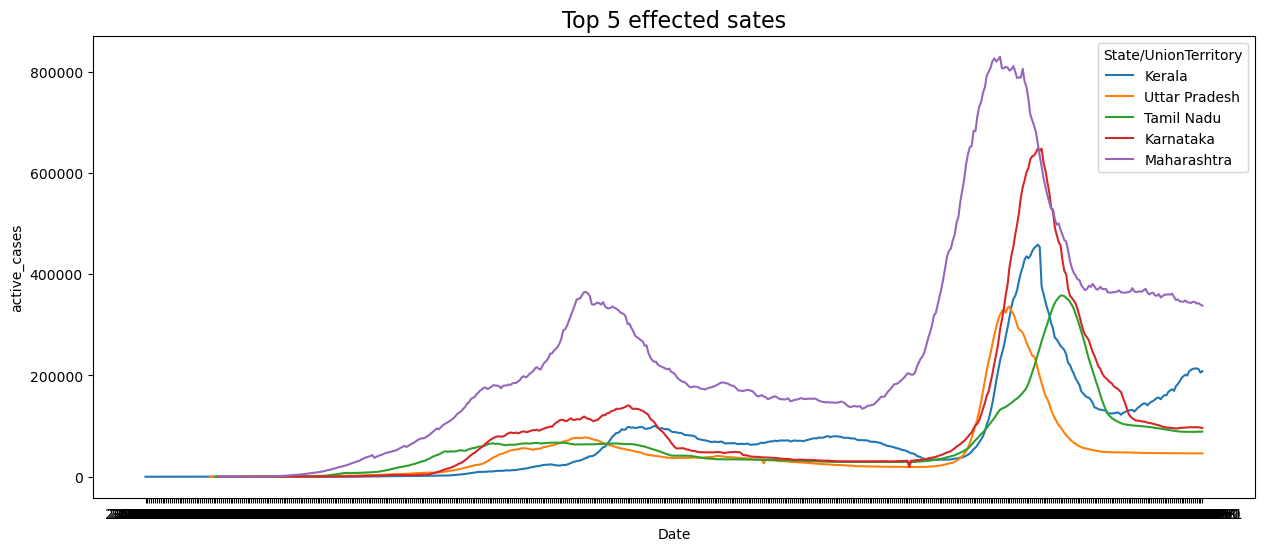

In [11]:
plt.figure(figsize=(15,6))
ax=sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Tamil Nadu','Uttar Pradesh','Kerala'])],x='Date',y='active_cases',hue='State/UnionTerritory')
ax.set_title("Top 5 effected sates",size=16)

In [12]:
# Vaccination
vaccine_df=pd.read_csv("C:/Users/Chaithanya/Desktop/covid project/archive/covid_vaccine_statewise.csv")
vaccine_df




,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
vaccine_df['Updated On']# provided 8 months data

0       16/01/2021
1       17/01/2021
2       18/01/2021
3       19/01/2021
4       20/01/2021
           ...    
7840    11/08/2021
7841    12/08/2021
7842    13/08/2021
7843    14/08/2021
7844    15/08/2021
Name: Updated On, Length: 7845, dtype: object

In [14]:
#checking the basic information
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [56]:
vaccine_df=vaccine_df[vaccine_df['State']!='India']
vaccine_df

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


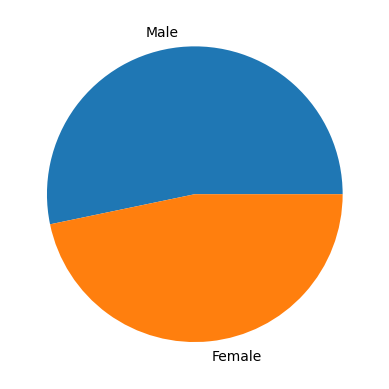

In [76]:
male=vaccine_df['Male (Doses Administered)'].sum()
female=vaccine_df['Female (Doses Administered)'].sum()
y=[male,female]
plt.pie(y,labels=['Male','Female'])
plt.show()



In [41]:
#state/union territory with least survival rate
mi=rates['survival_rate'].min()
rates[rates['survival_rate']==mi]

,State/UnionTerritory,Confirmed,Deaths,Cured,mortality_rate,survival_rate
6,Cases being reassigned to states,9265,0,0,0.0,0.0
42,Unassigned,77,0,0,0.0,0.0
11,Daman & Diu,2,0,0,0.0,0.0


In [68]:
male=


<class 'pandas.core.series.Series'>
Int64Index: 7633 entries, 212 to 7844
Series name: Male(Individuals Vaccinated)
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 119.3 KB


In [17]:
vaccine_df


,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#the totalindividuals vaccinted are
vaccine_df['Total Individuals Vaccinated'].sum()

13456367283.0

In [19]:
vaccine_df['State'].value_counts()

Delhi                                       213
Andaman and Nicobar Islands                 212
Punjab                                      212
Manipur                                     212
Meghalaya                                   212
Mizoram                                     212
Nagaland                                    212
Odisha                                      212
Puducherry                                  212
Rajasthan                                   212
Madhya Pradesh                              212
Sikkim                                      212
Tamil Nadu                                  212
Telangana                                   212
Tripura                                     212
Uttar Pradesh                               212
Uttarakhand                                 212
Maharashtra                                 212
Lakshadweep                                 212
Andhra Pradesh                              212
Goa                                     

In [25]:
info=vaccine_df.groupby('State').sum()['Total Individuals Vaccinated'].reset_index()


In [27]:
info.sort_values(by='Total Individuals Vaccinated',ascending=False,inplace=True)

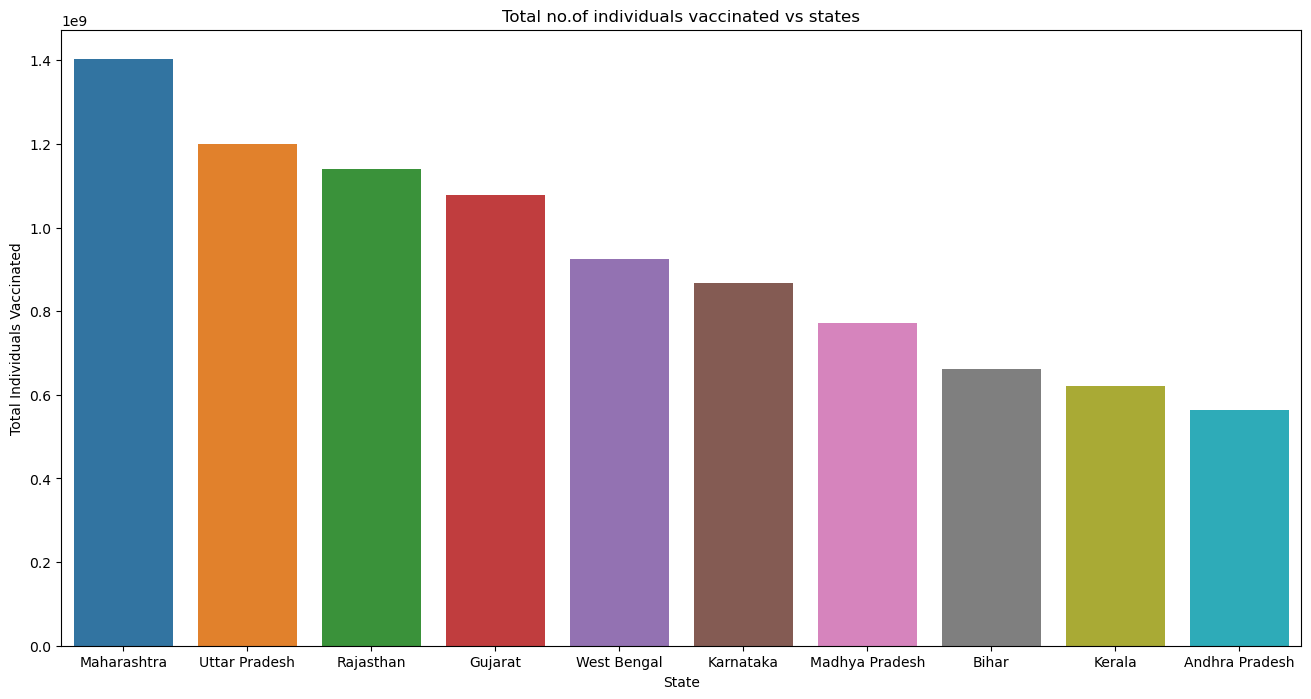

In [28]:
plt.figure(figsize=(16,8))
sns.barplot(data=info.iloc[:10],x='State',y='Total Individuals Vaccinated')
plt.title("Total no.of individuals vaccinated vs states")
plt.show()

In [31]:
rates=covid_df.groupby('State/UnionTerritory').max()[['Confirmed','Deaths','Cured']].reset_index()

In [33]:
rates['mortality_rate']=rates['Deaths']*100/rates['Confirmed']
rates['survival_rate']=rates['Cured']*100/rates['Confirmed']



In [35]:
rates.sort_values(by='Confirmed',inplace=True,ascending=False)
rates


,State/UnionTerritory,Confirmed,Deaths,Cured,mortality_rate,survival_rate
27,Maharashtra,6363442,134201,6159676,2.108937,96.797865
28,Maharashtra***,6229596,130753,6000911,2.098900,96.329056
22,Kerala,3586693,18004,3396184,0.501967,94.688450
21,Karnataka,2921049,36848,2861499,1.261465,97.961349
20,Karanataka,2885238,36197,2821491,1.254559,97.790581
38,Tamil Nadu,2579130,34367,2524400,1.332504,97.877967
1,Andhra Pradesh,1985182,13564,1952736,0.683262,98.365591
43,Uttar Pradesh,1708812,22775,1685492,1.332797,98.635309
45,West Bengal,1534999,18252,1506532,1.189056,98.145471
12,Delhi,1436852,25068,1411280,1.744647,98.220276


In [34]:
# state/union territory with highest survival rate
maxi=rates['survival_rate'].max()
rates[rates['survival_rate']==maxi]

,State/UnionTerritory,Confirmed,Deaths,Cured,mortality_rate,survival_rate
10,Dadra and Nagar Haveli and Daman and Diu,10654,4,10646,0.037545,99.924911


In [46]:
# the average survival rate is
avg_rate=rates['survival_rate'].mean()
avg_rate

89.96262317413135

In [38]:
# state/union territory with highest mortality rate
maxi=rates['mortality_rate'].max()
rates[rates['mortality_rate']==maxi]


,State/UnionTerritory,Confirmed,Deaths,Cured,mortality_rate,survival_rate
35,Punjab,599573,16322,582791,2.722271,97.201008


In [47]:
# the average mortality rate is
avg_rate=rates['mortality_rate'].mean()
avg_rate

1.1473516733289797

In [49]:
rates.sort_values(by='mortality_rate',ascending=False,inplace=True)
rates=rates[rates['State/UnionTerritory']!='Maharashtra***']

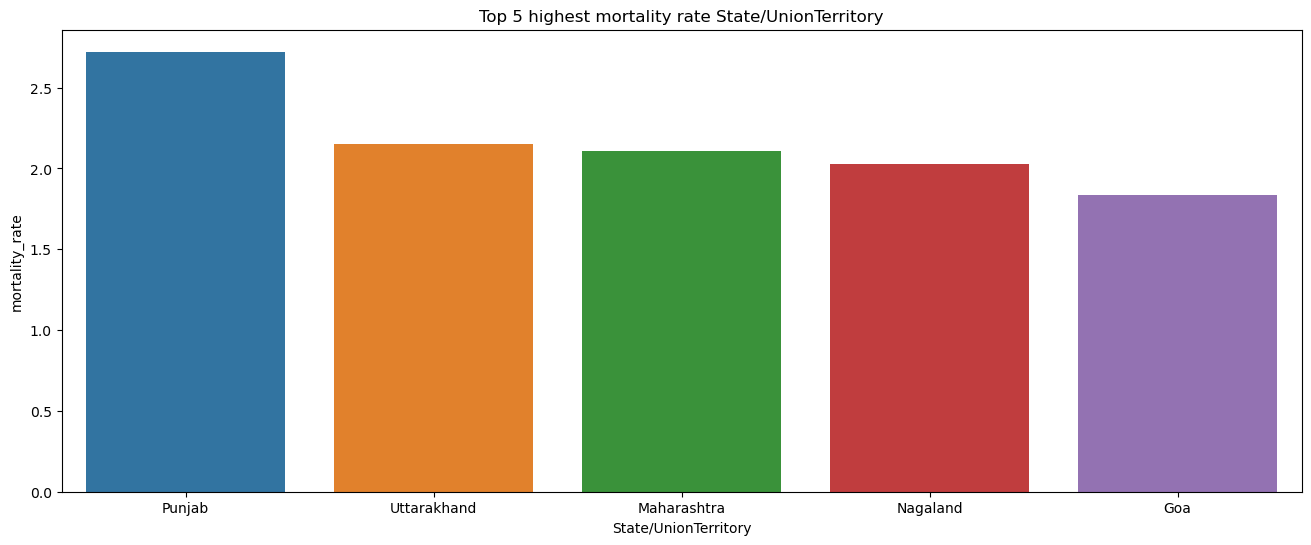

In [50]:
plt.figure(figsize=(16,6))
sns.barplot(data=rates.iloc[:5],x='State/UnionTerritory',y='mortality_rate')
plt.title("Top 5 highest mortality rate State/UnionTerritory")

plt.show()

In [40]:
rates.sort_values(by='survival_rate',ascending=False,inplace=True)


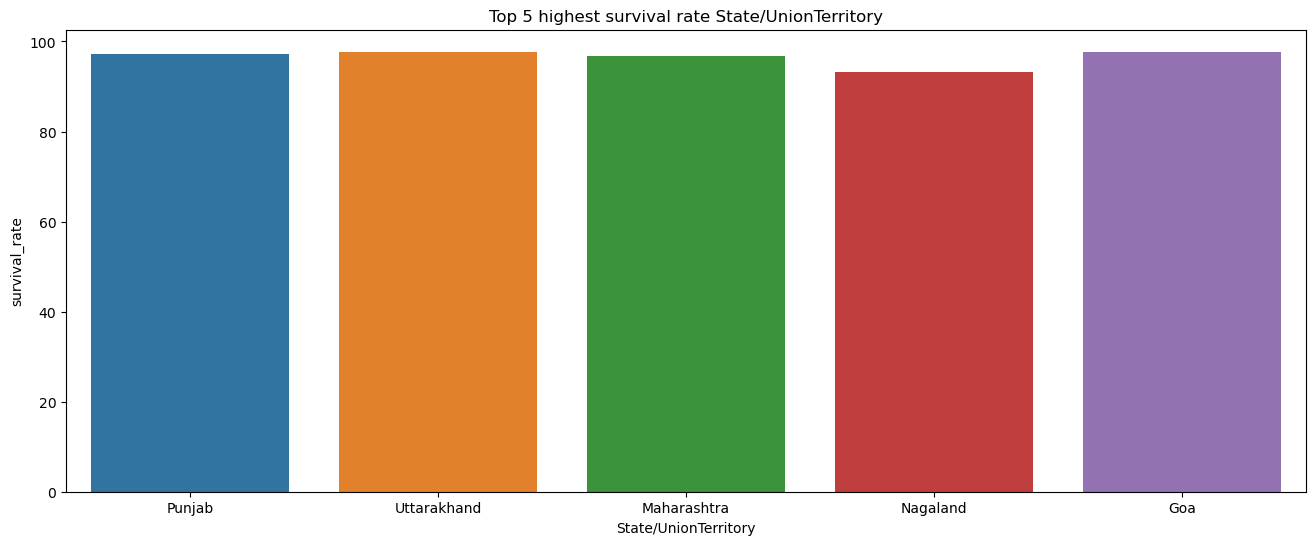

In [39]:
plt.figure(figsize=(16,6))
sns.barplot(data=rates.iloc[:5],x='State/UnionTerritory',y='survival_rate')
plt.title("Top 5 highest survival rate State/UnionTerritory")
plt.show()